# Data Cleaning

In [297]:
import numpy as np 
import pandas as pd

In [298]:
df = pd.read_csv('data/laptop_price.csv', encoding='ISO-8859-1')

In [299]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [300]:
# simplify column namings
df = df.rename(columns=str.lower)
df = df.rename(columns={'price_euros':'price'})

# remove redundant column
df=df.drop('laptop_id', axis=1)

## Screen Resolution

In [301]:
df['screenresolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: screenresolution, Length: 1303, dtype: object

In [302]:
df['resolution'] = df['screenresolution'].str.extract(r'(\d+x\d+)')

In [303]:
df['screentype'] = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)
df['screentype'] = df['screentype'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','',regex=True)

In [304]:
df['touchscreen'] = df['screentype'].str.contains('Touchscreen')

In [305]:
df['screentype'] = df['screentype'].replace(r'(Touchscreen)','',regex=True).replace(r' ','',regex=True)
df['screentype'].value_counts()

                         938
IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [306]:
df['screentype'] = df['screentype'].replace(r'^\s*$', np.nan, regex=True)
df['screentype'].value_counts()

IPSPanel                 348
IPSPanelRetinaDisplay     17
Name: screentype, dtype: int64

In [307]:
df = df.drop('screenresolution', axis=1)
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,False
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,False
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,False
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,False
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,False


## CPU

In [308]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

In [309]:
# extract cpu freq
df['cpu(GHz)'] = df['cpu'].str.extract(r'(\d+(?:\.\d+))').astype(float)

# remove freq from `cpu` column
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True)

In [310]:
df.head()

,company,product,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,False,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,False,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,False,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,False,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,False,3.1


## RAM

In [311]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)
df.head()

,company,product,typename,inches,cpu,ram(GB),memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,False,2.3
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,False,1.8
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,False,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,False,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,False,3.1


## Memory

In [312]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [313]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [314]:
# unify the units
df['memory']=df['memory'].str.replace('1.0TB','1TB', regex=True)
df['memory']=df['memory'].str.replace('1TB','1000GB')
df['memory']=df['memory'].str.replace('2TB','2000GB')
df['memory']=df['memory'].str.replace('GB','')
df['memory']=df['memory'].str.replace(r' ','')
df['memory'].value_counts()

256SSD                    412
1000HDD                   224
500HDD                    132
512SSD                    118
128SSD+1000HDD             94
128SSD                     76
256SSD+1000HDD             73
32FlashStorage             38
2000HDD                    16
64FlashStorage             15
512SSD+1000HDD             14
1000SSD                    14
256SSD+2000HDD             10
1000Hybrid                  9
256FlashStorage             8
16FlashStorage              7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [315]:
df[['memory1','memory2']] = df.memory.str.split("+",expand=True)
df['memory_1_storage_gb'] = df['memory1'].str.extract(r'(\d+)').astype(float)
df['memory_1_type'] = df['memory1'].str.replace('\d+', '')
df['memory_2_storage_gb'] = df['memory2'].str.extract(r'(\d+)').astype(float)
df['memory_2_type'] = df['memory2'].str.replace('\d+', '')
df = df.drop('memory1', axis=1)
df = df.drop('memory2', axis=1)
df = df.drop('memory', axis=1)
df = df.replace({'NaN': np.nan})
df['memory_2_storage_gb'] = df['memory_2_storage_gb'].replace(np.nan, 0)

<ipython-input-315-054273f9b2ee>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory_1_type'] = df['memory1'].str.replace('\d+', '')
<ipython-input-315-054273f9b2ee>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['memory_2_type'] = df['memory2'].str.replace('\d+', '')


In [316]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight,price,resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2560x1600,IPSPanelRetinaDisplay,False,2.3,128.0,SSD,0.0,None
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34kg,898.94,1440x900,NaN,False,1.8,128.0,FlashStorage,0.0,None
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86kg,575.00,1920x1080,NaN,False,2.5,256.0,SSD,0.0,None
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2880x1800,IPSPanelRetinaDisplay,False,2.7,512.0,SSD,0.0,None
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,2560x1600,IPSPanelRetinaDisplay,False,3.1,256.0,SSD,0.0,None


## Weight

In [317]:
df['weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: weight, Length: 179, dtype: int64

In [318]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)

In [319]:
df.head()

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),price,resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type
0,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,False,2.3,128.0,SSD,0.0,None
1,Apple,Macbook Air,Ultrabook,13.3,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,898.94,1440x900,NaN,False,1.8,128.0,FlashStorage,0.0,None
2,HP,250 G6,Notebook,15.6,Intel Core i5 7200U,8,Intel HD Graphics 620,No OS,1.86,575.00,1920x1080,NaN,False,2.5,256.0,SSD,0.0,None
3,Apple,MacBook Pro,Ultrabook,15.4,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,False,2.7,512.0,SSD,0.0,None
4,Apple,MacBook Pro,Ultrabook,13.3,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,False,3.1,256.0,SSD,0.0,None


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   cpu                  1303 non-null   object 
 5   ram(GB)              1303 non-null   int64  
 6   gpu                  1303 non-null   object 
 7   opsys                1303 non-null   object 
 8   weight(kg)           1303 non-null   float64
 9   price                1303 non-null   float64
 10  resolution           1303 non-null   object 
 11  screentype           365 non-null    object 
 12  touchscreen          1303 non-null   bool   
 13  cpu(GHz)             1217 non-null   float64
 14  memory_1_storage_gb  1303 non-null   float64
 15  memory_1_type        1303 non-null   o

### Train test split

In [321]:
import numpy as np
from sklearn.model_selection import train_test_split

In [322]:
from sklearn import preprocessing

target = "log_price"
numericFeatures = ["inches", "ram(GB)", "weight(kg)", "cpu(GHz)", "memory_1_storage_gb", "memory_2_storage_gb"]
catFeatures = ["company", "product", "typename", "cpu", "gpu", "opsys", "resolution", "screentype", "touchscreen", "memory_1_type", "memory_2_type"]

en = preprocessing.LabelEncoder()
for cols in catFeatures:
    df[cols] = en.fit_transform(df[cols])
print('Dataframe encoded by Label encoding dimension : ', df.shape)

Dataframe encoded by Label encoding dimension :  (1303, 18)


In [323]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.1, random_state=42)

In [324]:
laptop_train = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
laptop_test = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)

In [325]:
laptop_train

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,price
0,4,239,3,15.6,49,6,53,5,2.30,0,2,0,2.40,1000.0,1,0.0,3,459.00
1,10,291,1,15.6,58,8,75,5,2.50,3,0,0,2.50,256.0,3,0.0,3,829.00
2,4,576,4,13.3,81,8,61,5,1.20,3,2,0,1.80,256.0,3,0.0,3,1579.00
3,2,602,4,13.3,38,8,46,5,1.20,3,0,0,0.90,512.0,3,0.0,3,729.00
4,4,239,3,15.6,47,4,24,2,2.25,0,2,0,2.00,1000.0,1,0.0,3,465.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,0,77,3,15.6,57,8,86,5,2.40,3,2,0,2.50,256.0,3,1000.0,0,799.00
1168,7,27,3,15.6,73,8,53,5,2.04,0,2,0,2.70,2000.0,1,0.0,3,629.00
1169,7,324,3,15.6,10,6,29,5,2.04,3,2,0,2.90,1000.0,2,0.0,3,549.99
1170,10,456,3,15.6,57,8,53,5,2.30,3,0,0,2.50,1000.0,1,0.0,3,850.66


In [326]:
laptop_test

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,price
0,16,334,3,13.3,57,8,53,5,1.05,3,0,0,2.5,256.0,3,0.0,3,1672.0
1,7,417,3,13.3,57,8,53,5,1.11,3,0,0,2.5,256.0,3,0.0,3,1149.0
2,10,202,3,15.6,0,6,18,5,2.40,3,2,0,2.4,1000.0,1,0.0,3,499.0
3,10,225,3,15.6,69,8,89,5,2.60,3,0,0,2.6,1000.0,1,0.0,3,899.0
4,7,110,4,12.5,52,4,47,5,1.26,0,2,0,2.3,256.0,3,0.0,3,1244.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,4,279,4,14.0,75,8,53,2,1.60,3,2,0,2.8,256.0,3,0.0,3,1099.0
127,4,239,3,15.6,57,12,53,5,2.25,0,2,0,2.5,1000.0,1,0.0,3,649.0
128,7,317,1,17.3,77,16,75,5,3.35,3,0,0,2.8,256.0,3,1000.0,0,1379.0
129,7,326,4,15.6,81,8,85,5,1.83,3,0,0,1.8,256.0,3,0.0,3,699.0


In [327]:
#laptop_train.to_csv('data/laptop_train.csv', index=False)
#laptop_test.to_csv('data/laptop_test.csv', index=False)

---

# Outliers

In [328]:
import matplotlib.pyplot as plt

In [329]:
#df = pd.read_csv('data/laptop_train.csv', encoding='ISO-8859-1')
df = laptop_train.copy()

In [330]:
df['company'].value_counts()

10    273
4     264
7     244
2     141
0      95
11     49
16     43
1      20
15      7
14      6
13      5
12      5
17      4
5       3
6       3
9       3
3       3
8       2
18      2
Name: company, dtype: int64

In [331]:
df['typename'].value_counts()

3    652
1    184
4    179
0    104
5     28
2     25
Name: typename, dtype: int64

In [332]:
df['inches'].value_counts()

15.6    597
14.0    178
17.3    145
13.3    144
12.5     38
11.6     31
13.9      6
12.0      5
12.3      5
13.5      5
15.4      4
15.0      4
10.1      4
13.0      2
18.4      1
11.3      1
14.1      1
17.0      1
Name: inches, dtype: int64

In [333]:
# let's keep only 6 most popular sizes
df = df[df.inches.isin([15.6, 14.0, 13.3, 17.3, 12.5, 11.6])]

In [334]:
df['cpu'].value_counts()

57    166
77    139
73    118
47     77
81     66
     ... 
89      1
20      1
43      1
26      1
56      1
Name: cpu, Length: 78, dtype: int64

In [335]:
df['ram(GB)'].value_counts()

8     526
4     339
16    176
6      36
12     21
2      19
32     12
24      3
64      1
Name: ram(GB), dtype: int64

In [336]:
df[df['ram(GB)'] == 64]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,price
140,2,380,1,17.3,70,64,92,5,3.58,3,0,0,2.7,1000.0,3,0.0,3,3975.0


In [337]:
df = df[df['ram(GB)'] != 64]

In [338]:
df['gpu'].value_counts()

53     244
47     173
75      60
61      57
79      43
      ... 
57       1
106      1
64       1
81       1
48       1
Name: gpu, Length: 97, dtype: int64

In [339]:
df['opsys'].value_counts()

5    942
2     57
4     55
7     44
1     21
8      8
3      3
6      2
Name: opsys, dtype: int64

In [340]:
df['weight(kg)'].value_counts()

2.20    110
2.10     53
2.00     41
2.40     40
2.50     35
       ... 
1.98      1
4.70      1
1.41      1
3.25      1
1.14      1
Name: weight(kg), Length: 160, dtype: int64

(array([119., 215., 230., 347., 133.,  31.,  21.,   6.,  11.,  19.]),
 array([0.91 , 1.289, 1.668, 2.047, 2.426, 2.805, 3.184, 3.563, 3.942,
        4.321, 4.7  ]),
 <a list of 10 Patch objects>)

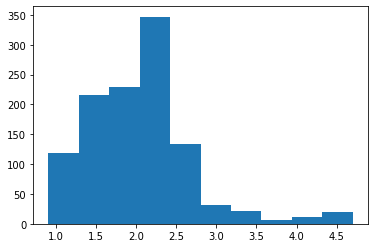

In [341]:
plt.hist(df['weight(kg)'])

(array([379., 369., 200., 113.,  48.,  15.,   4.,   2.,   1.,   1.]),
 array([ 174. ,  706.5, 1239. , 1771.5, 2304. , 2836.5, 3369. , 3901.5,
        4434. , 4966.5, 5499. ]),
 <a list of 10 Patch objects>)

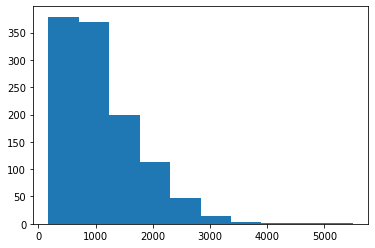

In [342]:
plt.hist(df['price'])

In [343]:
df[df['price'] > 3500]

,company,product,typename,inches,cpu,ram(GB),gpu,opsys,weight(kg),resolution,screentype,touchscreen,cpu(GHz),memory_1_storage_gb,memory_1_type,memory_2_storage_gb,memory_2_type,price
33,10,480,3,15.6,91,32,104,5,2.50,14,0,0,3.1,1000.0,3,0.0,3,4899.0
259,4,56,1,17.3,77,32,80,5,4.36,14,2,0,2.8,1000.0,3,1000.0,0,3659.4
486,2,381,1,17.3,78,32,82,5,4.70,3,2,0,2.9,512.0,3,1000.0,0,3890.0
563,4,56,1,17.3,77,32,81,5,4.42,3,0,0,2.8,1000.0,3,1000.0,0,3588.8
799,14,85,1,17.3,78,32,82,5,3.49,14,2,1,2.9,512.0,3,0.0,3,5499.0
930,7,598,5,17.3,90,16,102,7,3.00,3,0,0,2.9,256.0,3,0.0,3,4389.0
1017,7,595,5,17.3,69,8,105,7,3.00,3,0,0,2.6,256.0,3,0.0,3,3949.4


In [344]:
df['log_price'] = np.log(df['price'])

(array([ 19.,  55., 131., 162., 206., 239., 194.,  96.,  26.,   4.]),
 array([5.1590553 , 5.50438192, 5.84970855, 6.19503517, 6.54036179,
        6.88568842, 7.23101504, 7.57634167, 7.92166829, 8.26699491,
        8.61232154]),
 <a list of 10 Patch objects>)

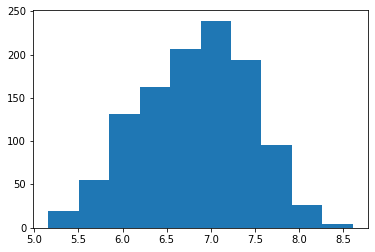

In [345]:
plt.hist(df['log_price'])

In [346]:
df = df.drop('price', axis=1)

In [347]:
df['resolution'].value_counts()

3     744
0     275
14     36
13     23
2      22
9      22
10      6
1       4
Name: resolution, dtype: int64

In [348]:
df['screentype'].value_counts()

2    831
0    295
1      6
Name: screentype, dtype: int64

In [349]:
df['touchscreen'].value_counts()

0    982
1    150
Name: touchscreen, dtype: int64

(array([ 50.,  12., 132.,  72.,  27., 380., 204., 167.,   4.,   4.]),
 array([0.9 , 1.17, 1.44, 1.71, 1.98, 2.25, 2.52, 2.79, 3.06, 3.33, 3.6 ]),
 <a list of 10 Patch objects>)

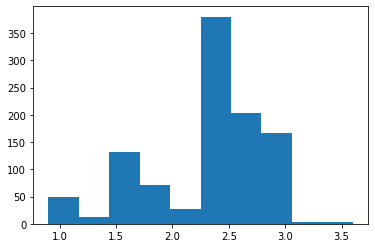

In [350]:
plt.hist(df['cpu(GHz)'])

(array([217., 439., 242.,   0., 224.,   0.,   0.,   0.,   0.,  10.]),
 array([   8. ,  207.2,  406.4,  605.6,  804.8, 1004. , 1203.2, 1402.4,
        1601.6, 1800.8, 2000. ]),
 <a list of 10 Patch objects>)

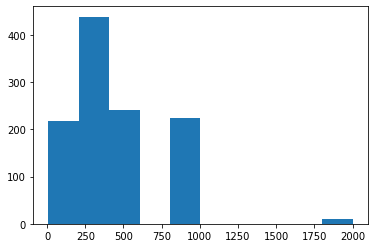

In [351]:
plt.hist(df['memory_1_storage_gb'])

In [352]:
df['memory_1_type'].value_counts()

3    731
1    336
0     55
2     10
Name: memory_1_type, dtype: int64

(array([945.,   2.,   3.,   0.,   0., 169.,   0.,   0.,   0.,  13.]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <a list of 10 Patch objects>)

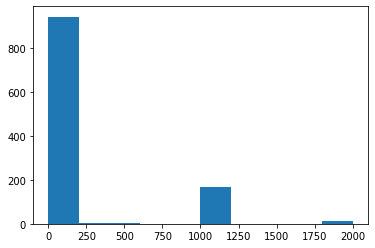

In [353]:
plt.hist(df['memory_2_storage_gb'])

In [354]:
df['memory_2_type'].value_counts()

3    945
0    183
2      3
1      1
Name: memory_2_type, dtype: int64

---

# Export ready datasets

In [355]:
# I also modify test dataset by putting log on the price
laptop_test['log_price'] = np.log(laptop_test['price'])
laptop_test = laptop_test.drop('price', axis=1)

In [356]:
df.to_csv('data/laptop_train.csv', index=False)
laptop_test.to_csv('data/laptop_test.csv', index=False)